In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "data/twitter_training.csv",
    header=None,
    names=["tweet_id", "entity", "sentiment", "tweet"]
)

df.head()


,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
df = df.dropna(subset=["tweet"])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   73996 non-null  int64 
 1   entity     73996 non-null  object
 2   sentiment  73996 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [23]:
df["sentiment"].value_counts()


sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

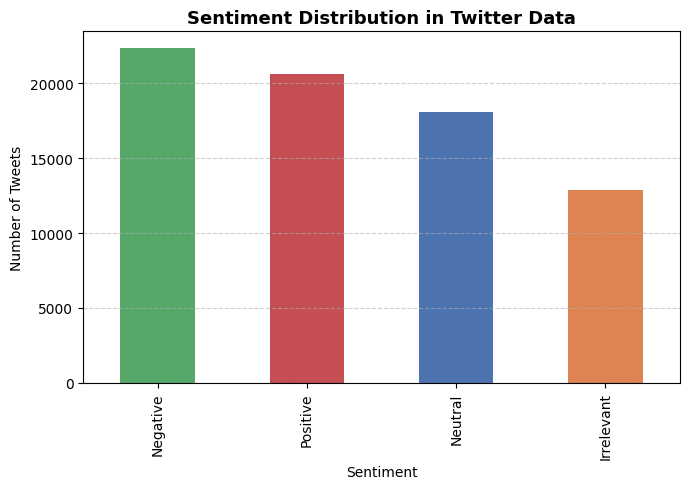

In [24]:
plt.figure(figsize=(7,5))

df["sentiment"].value_counts().plot(
    kind="bar",
    color=["#55A868", "#C44E52", "#4C72B0", "#DD8452"]
)

plt.title("Sentiment Distribution in Twitter Data", fontsize=13, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/sentiment_distribution.png", dpi=300)
plt.show()

In [25]:
top_entities = df["entity"].value_counts().head(5).index
top_entities


Index(['MaddenNFL', 'LeagueOfLegends', 'CallOfDuty', 'Verizon',
       'TomClancysRainbowSix'],
      dtype='object', name='entity')

In [26]:
df_top_entities = df[df["entity"].isin(top_entities)]
df_top_entities.head()


,tweet_id,entity,sentiment,tweet
30258,7201,LeagueOfLegends,Neutral,Check out my video!
30259,7201,LeagueOfLegends,Neutral,Take a look at my video!
30260,7201,LeagueOfLegends,Neutral,Watch my video!
30261,7201,LeagueOfLegends,Neutral,Check out our video!
30262,7201,LeagueOfLegends,Neutral,Check for out my video!


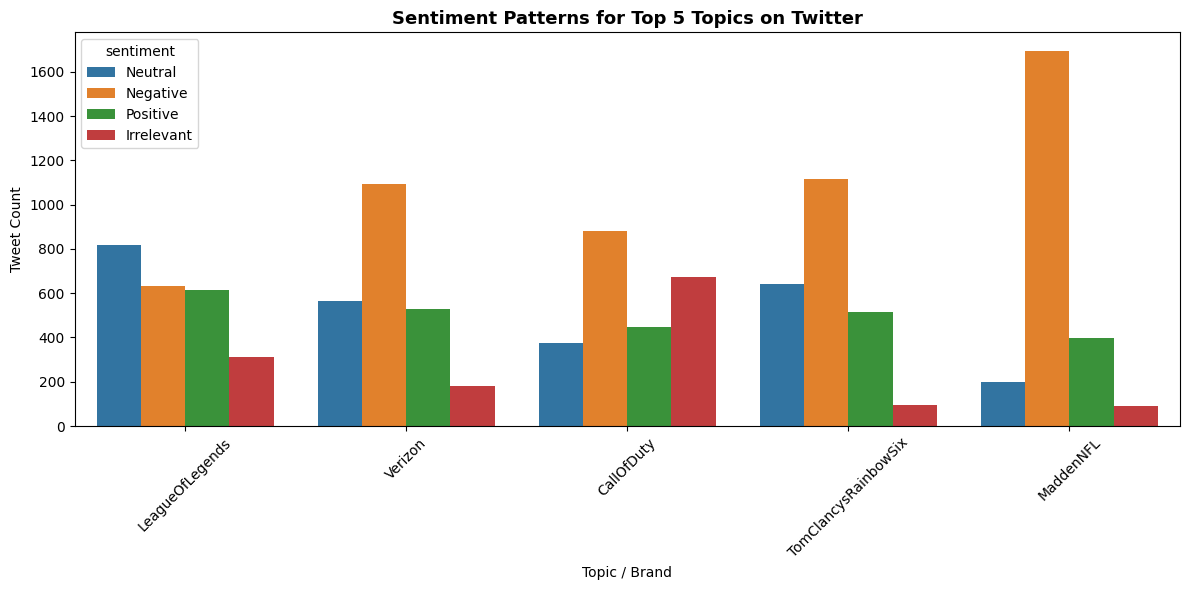

In [27]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_top_entities,
    x="entity",
    hue="sentiment",
    palette="tab10"
)

plt.title("Sentiment Patterns for Top 5 Topics on Twitter", fontsize=13, fontweight="bold")
plt.xlabel("Topic / Brand")
plt.ylabel("Tweet Count")

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("visualization/sentiment_by_top_entities.png", dpi=300)
plt.show()